# Problem1

In [1]:
import numpy as np
import pandas as pd

In [2]:
def A_matrix(n):
    A = np.identity(n)
    for i in range(n):
        t_i = -1 + 2*(i/(n-1))
        for j in range(n):
            A[i][j] = t_i**j
    return A

In [3]:
res = np.zeros((21,4))

In [4]:
for n in range(10,31,1):
    x = np.ones(n)
    A = A_matrix(n)
    b = np.dot(A, x)
    #x_ = np.dot(np.linalg.inv(A), b)
    x_ = np.linalg.solve(A,b)
    u, s, v = np.linalg.svd(A)
    
    res[int(n-10)][0] = int(n)
    res[int(n-10)][1] = 1/s[-1]
    res[int(n-10)][2] = np.linalg.norm(x - x_) 
    res[int(n-10)][3] = s[-1] * res[int(n-10)][2]

In [5]:
df = pd.DataFrame(res, columns=['n', '1/𝜎𝑛','||𝑥−𝑥𝑐𝑜𝑚𝑝||2','||𝑥−𝑥𝑐𝑜𝑚𝑝||2𝜎𝑛'])
df.set_index('n')

,1/𝜎𝑛,||𝑥−𝑥𝑐𝑜𝑚𝑝||2,||𝑥−𝑥𝑐𝑜𝑚𝑝||2𝜎𝑛
n,,,
10.0,1.173155e+03,3.800178e-13,3.239279e-16
11.0,3.301479e+03,6.458212e-13,1.956157e-16
12.0,9.372283e+03,2.160857e-12,2.305583e-16
13.0,2.680040e+04,1.083016e-11,4.041044e-16
14.0,7.711071e+04,1.977455e-11,2.564436e-16
15.0,2.230420e+05,2.509219e-11,1.124999e-16
16.0,6.481167e+05,1.150114e-10,1.774547e-16
17.0,1.890896e+06,2.760896e-10,1.460099e-16
18.0,5.536378e+06,4.197689e-09,7.582013e-16


# Problem2

In [25]:
# import packages
import numpy as np

# load and display an image with Matplotlib
from matplotlib import rc, rcParams
rcParams['font.size'] = 20
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.usetex'] = False
from matplotlib import image
from matplotlib import pyplot

In [7]:
def show_original_image(data):
    # summarize shape of the pixel array
    print(data.shape)
    # display the array of pixels as an image
    pyplot.figure(figsize=(8,8))
    pyplot.imshow(data)
    pyplot.show()
    
    # convert to real and scale to [0,1]. Images stores as reals need tk be between [0,1]
    data = data.astype(float)/255.0
    pyplot.figure(figsize=(8,8))
    pyplot.imshow(data)
    pyplot.show()

In [8]:
def computw_svd(data):
    data = data.astype(float)/255.0
    
    # compute SVDs or red, green, blue image matrices
    Ur, Sr, Vtr = np.linalg.svd(data[:,:,0], full_matrices=False)
    Ug, Sg, Vtg = np.linalg.svd(data[:,:,1], full_matrices=False)
    Ub, Sb, Vtb = np.linalg.svd(data[:,:,2], full_matrices=False)

    pyplot.semilogy(Sr/Sr[0], marker='o', color = 'red')
    pyplot.semilogy(Sg/Sg[0], marker='x', color = 'green')
    pyplot.semilogy(Sb/Sb[0], marker='*', color = 'blue')
    pyplot.xlabel("j", fontsize="20")
    pyplot.ylabel("$\sigma_j/\sigma_o$", fontsize="20")
    pyplot.title("normalized singular values", fontsize="20")
    pyplot.legend(['red', 'green', 'blue'])
    pyplot.show()
    
    data_r = np.zeros(data.shape)

    for i in range(4):
        r = 2**i
        data_r[:,:,0] = Ur[:,0:r] @ np.diag(Sr[0:r]) @ Vtr[0:r,:]
        data_r[:,:,1] = Ug[:,0:r] @ np.diag(Sg[0:r]) @ Vtg[0:r,:]
        data_r[:,:,2] = Ub[:,0:r] @ np.diag(Sb[0:r]) @ Vtb[0:r,:]
        
        data_r[data_r<0] = 0
        data_r[data_r>1] = 1
        
        pyplot.figure(figsize=(8,8))
        pyplot.imshow(data_r)
        pyplot.title('rank k = {0:5d} approximation'.format(r), fontsize="20")
        pyplot.show()

In [9]:
path = '/Users/rubychang/Desktop/CAAM 550/UK-flag.jpeg'
data = image.imread(path)
show_original_image(data)
computw_svd(data)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rubychang/Desktop/CAAM 550/UK-flag.jpeg'

In [ ]:
path = '/Users/rubychang/Desktop/CAAM 550/CA-flag.jpeg'
data = image.imread(path)
show_original_image(data)
computw_svd(data)

In [ ]:
path = '/Users/rubychang/Desktop/CAAM 550/CH-flag.jpeg'
data = image.imread(path)
show_original_image(data)
computw_svd(data)

In [ ]:
path = '/Users/rubychang/Desktop/CAAM 550/AU-flag.jpeg'
data = image.imread(path)
show_original_image(data)
computw_svd(data)

# Problem3

In [10]:
# import packages
import numpy as np
import math as m
import matplotlib.pyplot as plt
from numpy.linalg import svd
from numpy.linalg import norm

In [26]:
# specify problem
n = 100
h = 1/n
gamma = 0.05
xi = np.arange(1/2, n, dtype=float)/n
# true image
ftrue = np.exp( -(xi-0.75)**2 *70 )
ind = np.all([0.1<=xi, xi<=0.25], axis =0)  # indices for which xi in [0.1,0.25]
ftrue[ind] = 0.8
ind = np.all([0.3<=xi, xi<=0.35], axis =0)  # indices for which xi in [0.3,0.35]
ftrue[ind] = 0.3
# matrix K
C = 1/(gamma*np.sqrt(2*np.pi))
K = np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        K[i,j] = C*h* np.exp( -(xi[i]-xi[j])**2 / (2*gamma**2) )

gtrue = np.dot(K, ftrue)

# add error to true image
gerr = 0.001*np.multiply( 0.5 - np.random.uniform(0.05,0.5,n) , gtrue ) 
g = gtrue + gerr
gerror = 0.5*np.linalg.norm(gerr, 2)**2

In [27]:
# SVD
u, s, v = svd(K, full_matrices=True)

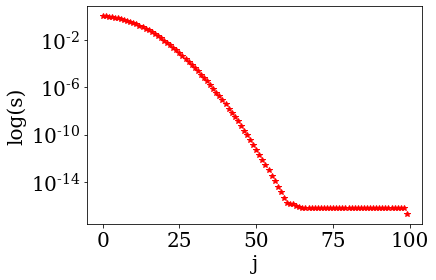

In [28]:
#j = range(1,n+1,1)
j = np.linspace(0,99,100)

fig = plt.figure()
plt.semilogy(j, s, '*r')
plt.xlabel('j')
plt.ylabel('log(s)')
plt.show()

In [29]:
ug_true = np.zeros(n)
for idx in range(0,n,1):
    vector = u[:,idx].T
    ug_true[idx] = np.dot(vector, gtrue)

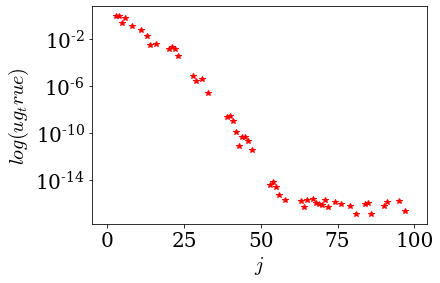

In [30]:
fig = plt.figure()
plt.semilogy(j, ug_true,'*r')
plt.xlabel('$j$')
plt.ylabel('$log(ug_true)$')
plt.show()

In [31]:
ug_err = np.zeros(n)
for idx in range(0,n,1):
    vector = u[:,idx].T
    ug_err[idx] = np.dot(vector, gerr)

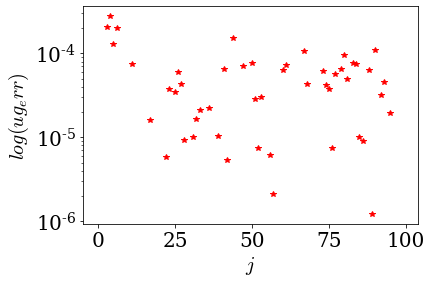

In [32]:
fig = plt.figure()
plt.semilogy(j, ug_err,'*r')
plt.xlabel('$j$')
plt.ylabel('$log(ug_err)$')
plt.show()

Text(0, 0.5, '$v75$')

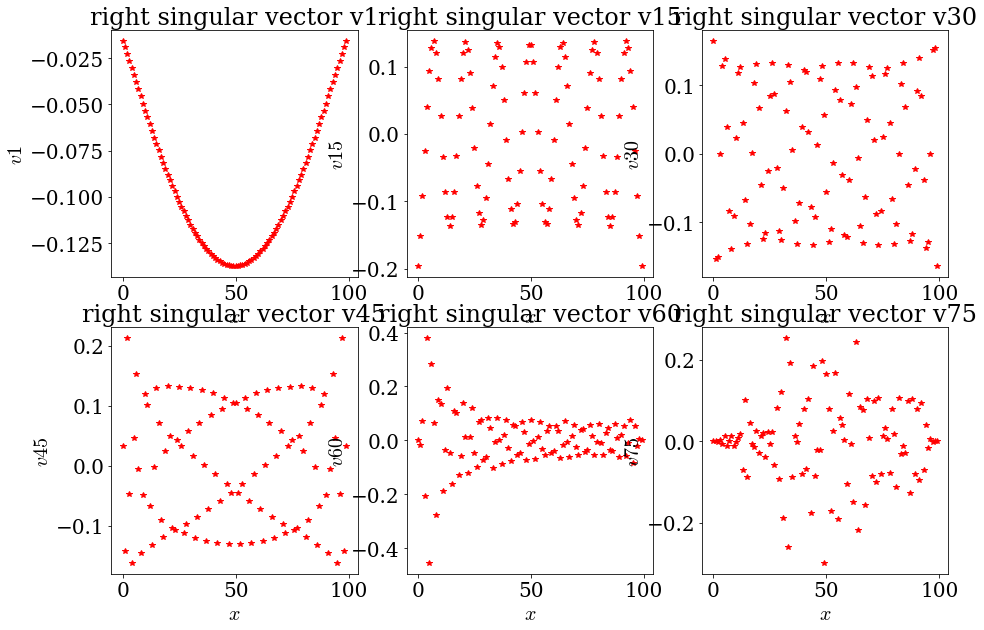

In [33]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs[0, 0].plot(j, v[0],'*r')
axs[0, 0].set_title('right singular vector v1')
axs[0, 0].set_xlabel('$x$')
axs[0, 0].set_ylabel('$v1$')

axs[0, 1].plot(j, v[14],'*r')
axs[0, 1].set_title('right singular vector v15')
axs[0, 1].set_xlabel('$x$')
axs[0, 1].set_ylabel('$v15$')

axs[0, 2].plot(j, v[29],'*r')
axs[0, 2].set_title('right singular vector v30')
axs[0, 2].set_xlabel('$x$')
axs[0, 2].set_ylabel('$v30$')

axs[1, 0].plot(j, v[44],'*r')
axs[1, 0].set_title('right singular vector v45')
axs[1, 0].set_xlabel('$x$')
axs[1, 0].set_ylabel('$v45$')

axs[1, 1].plot(j, v[59],'*r')
axs[1, 1].set_title('right singular vector v60')
axs[1, 1].set_xlabel('$x$')
axs[1, 1].set_ylabel('$v60$')

axs[1, 2].plot(j, v[74],'*r')
axs[1, 2].set_title('right singular vector v75')
axs[1, 2].set_xlabel('$x$')
axs[1, 2].set_ylabel('$v75$')

In [36]:
fk = np.zeros(n)
fk_norm = np.zeros(n)
kf_g = np.zeros(n)
kf_g_norm = np.zeros(n)
g_gtrue_norm = norm(g-gtrue)
g_gtrue_norm = norm(g-gtrue) * np.ones(n)

fk_ = np.zeros((n,n))

for idx in range(0,n,1):
    fk = fk + np.dot(np.dot(u[:,idx], g), v[idx]) / s[idx]
    fk_norm[idx] = norm(fk)
    
    fk_[:,idx] = fk
            
    kf_g = np.dot(K, fk) - g
    kf_g_norm[idx] = norm(kf_g)

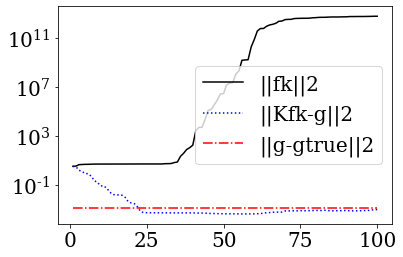

In [37]:
k = range(1,n+1,1)
fig = plt.figure()
plt.semilogy(k, fk_norm, '-k', label="||fk||2")
plt.semilogy(k, kf_g_norm, ':b', label="||Kfk-g||2")
plt.semilogy(k, g_gtrue_norm, '-.r', label="||g-gtrue||2")
#plt.xlabel('$j$')
#plt.ylabel('$log(ug_err)$')
plt.legend()
plt.show()

In [38]:
f = np.linalg.solve(K, g)

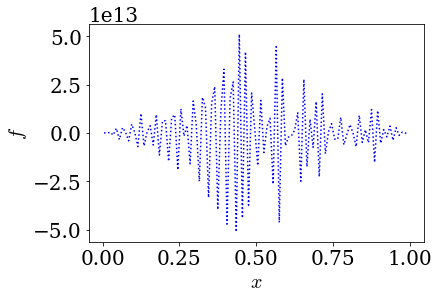

In [39]:
fig = plt.figure()
plt.plot(xi, f, ':b')
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.show()

In [23]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs[0, 0].plot(xi, fk_[:,0],'*r')
axs[0, 0].set_title('recovered image corresponding to f1')
axs[0, 0].set_xlabel('$x$')
axs[0, 0].set_ylabel('$f1$')

axs[0, 1].plot(xi, fk_[:,14],'*r')
axs[0, 1].set_title('recovered image corresponding to f15')
axs[0, 1].set_xlabel('$x$')
axs[0, 1].set_ylabel('$f15$')

axs[0, 2].plot(xi, fk_[:,29],'*r')
axs[0, 2].set_title('recovered image corresponding to f30')
axs[0, 2].set_xlabel('$x$')
axs[0, 2].set_ylabel('$f30$')

axs[1, 0].plot(xi, fk_[:,44],'*r')
axs[1, 0].set_title('recovered image corresponding to f45')
axs[1, 0].set_xlabel('$x$')
axs[1, 0].set_ylabel('$f45$')

axs[1, 1].plot(xi, fk_[:,59],'*r')
axs[1, 1].set_title('recovered image corresponding to f60')
axs[1, 1].set_xlabel('$x$')
axs[1, 1].set_ylabel('$f60$')

axs[1, 2].plot(xi, fk_[:,74],'*r')
axs[1, 2].set_title('recovered image corresponding to f75')
axs[1, 2].set_xlabel('$x$')
axs[1, 2].set_ylabel('$f75$')

Text(0, 0.5, '$f75$')

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1080x720 with 6 Axes>